# Exploration of the Feed Grains Database

The purpose of this chapter is to get our hands dirty with the [Feed Grains database](https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables.aspx#26780) maintained by the USDA ERS.

We use this data to reproduce several of the graphs in from Mindy Mallory's book [*Price Analysis*](http://mindymallory.com/PriceAnalysis/) - in particular from Chapters 12 (Forecasting Production), 13 (Forecasting Use of Corn), and 15 (Ending Stocks and Price).

The focus of this analysis is on corn.

## Import Pacakges

Let's begin by loading the packages that we will need.

In [ ]:
import pandas as pd
import numpy as np

## Read-In Data

Next, let's read-in our data.

In [ ]:
df_feed_grains = pd.read_csv('../data/FeedGrains.csv')
df_feed_grains

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1926,3,Annual,69,Commodity Market Year,8.796000
1,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1927,3,Annual,69,Commodity Market Year,9.513000
2,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1928,3,Annual,69,Commodity Market Year,12.828000
3,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1929,3,Annual,69,Commodity Market Year,14.703000
4,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1930,3,Annual,69,Commodity Market Year,13.581000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496558,3,Exports and imports,17.0,Oats,300,1.02,Caribbean Basin (CBERA),79,Oats products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",2022,1,Monthly,12,Dec,0.063158
496559,3,Exports and imports,17.0,Oats,300,1.02,Caribbean Basin (CBERA),79,Oats products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",2022,3,Annual,19,MY Jun-May,0.442165
496560,3,Exports and imports,17.0,Oats,300,1.02,Caribbean Basin (CBERA),79,Oats products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",2023,1,Monthly,1,Jan,0.051325
496561,3,Exports and imports,17.0,Oats,300,1.02,Caribbean Basin (CBERA),79,Oats products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",2023,1,Monthly,2,Feb,0.036997


## Production

Let's grab all the attributes that are related to production side of the WASDE balance sheet analysis.  We have to do this in two separate parts because the `Timeperiod_Desc` is different for some of the attributes.

In [ ]:
attributes = ['Harvested acreage', 'Yield per harvested acre', 'Planted acreage',
       'Prices received by farmers', 'Production', 'Imports', 'Total Supply']

df_tidy_corn = \
(
df_feed_grains
    .query('SC_Commodity_Desc == "Corn"')
    .query('SC_GeographyIndented_Desc == "United States"')
    .query('SC_Attribute_Desc == @attributes')
    .query('Timeperiod_Desc == "Commodity Market Year"')
    [['SC_Commodity_Desc', 'SC_GeographyIndented_Desc', 'SC_Attribute_Desc', 'Timeperiod_Desc','Year_ID', 'Amount', 'SC_Unit_Desc']]
)
df_tidy_corn

,SC_Commodity_Desc,SC_GeographyIndented_Desc,SC_Attribute_Desc,Timeperiod_Desc,Year_ID,Amount,SC_Unit_Desc
13840,Corn,United States,Harvested acreage,Commodity Market Year,1866,30.017,Million acres
13841,Corn,United States,Harvested acreage,Commodity Market Year,1867,32.116,Million acres
13842,Corn,United States,Harvested acreage,Commodity Market Year,1868,35.116,Million acres
13843,Corn,United States,Harvested acreage,Commodity Market Year,1869,35.833,Million acres
13844,Corn,United States,Harvested acreage,Commodity Market Year,1870,38.388,Million acres
...,...,...,...,...,...,...,...
15962,Corn,United States,Prices received by farmers,Commodity Market Year,2019,3.560,Dollars per bushel
15979,Corn,United States,Prices received by farmers,Commodity Market Year,2020,4.530,Dollars per bushel
15996,Corn,United States,Prices received by farmers,Commodity Market Year,2021,6.000,Dollars per bushel
16007,Corn,United States,Prices received by farmers,Commodity Market Year,2022,6.600,Dollars per bushel


In [ ]:
attributes = ['Imports, market year', 'Beginning stocks']

df_imports_stocks = \
    (
    df_feed_grains
        .query('SC_Commodity_Desc == "Corn"')
        .query('SC_GeographyIndented_Desc == "United States"')
        .query('SC_Attribute_Desc == @attributes')
        .query('Timeperiod_Desc.str.contains("MY")')
        [['SC_Commodity_Desc', 'SC_GeographyIndented_Desc', 'SC_Attribute_Desc', 'Timeperiod_Desc','Year_ID', 'Amount', 'SC_Unit_Desc']]
    )

df_tidy_corn = pd.concat([df_tidy_corn, df_imports_stocks])
df_tidy_corn

,SC_Commodity_Desc,SC_GeographyIndented_Desc,SC_Attribute_Desc,Timeperiod_Desc,Year_ID,Amount,SC_Unit_Desc
13840,Corn,United States,Harvested acreage,Commodity Market Year,1866,30.017,Million acres
13841,Corn,United States,Harvested acreage,Commodity Market Year,1867,32.116,Million acres
13842,Corn,United States,Harvested acreage,Commodity Market Year,1868,35.116,Million acres
13843,Corn,United States,Harvested acreage,Commodity Market Year,1869,35.833,Million acres
13844,Corn,United States,Harvested acreage,Commodity Market Year,1870,38.388,Million acres
...,...,...,...,...,...,...,...
16416,Corn,United States,"Imports, market year",MY Sep-Aug,2019,41.885,Million bushels
16421,Corn,United States,"Imports, market year",MY Sep-Aug,2020,24.233,Million bushels
16516,Corn,United States,"Imports, market year",MY Sep-Aug,2021,24.227,Million bushels
16519,Corn,United States,"Imports, market year",MY Sep-Aug,2022,40.000,Million bushels


Our analysis will be easier if we pivot our tidy data.

In [ ]:
df_supply = \
(
df_tidy_corn
    .pivot(index='Year_ID', columns='SC_Attribute_Desc', values='Amount')
    .reset_index()
    [['Year_ID', 'Beginning stocks','Planted acreage', 'Harvested acreage', 'Yield per harvested acre', 
      'Production', 'Prices received by farmers', 'Imports, market year']]
    .assign(total_supply = lambda df: df['Beginning stocks'] + df['Production'] + df['Imports, market year'])
)
df_supply.columns.name = None
df_supply

,Year_ID,Beginning stocks,Planted acreage,Harvested acreage,Yield per harvested acre,Production,Prices received by farmers,"Imports, market year",total_supply
0,1866,NaN,NaN,30.017,24.3000,730.814,0.657,NaN,NaN
1,1867,NaN,NaN,32.116,24.7000,793.905,0.781,NaN,NaN
2,1868,NaN,NaN,35.116,26.2000,919.590,0.617,NaN,NaN
3,1869,NaN,NaN,35.833,21.8000,782.084,0.725,NaN,NaN
4,1870,NaN,NaN,38.388,29.3000,1124.775,0.521,NaN,NaN
...,...,...,...,...,...,...,...,...,...
153,2019,2220.749,89.745,81.337,167.5000,13619.928,3.560,41.885,15882.562
154,2020,1919.462,90.652,82.313,171.4000,14111.449,4.530,24.233,16055.144
155,2021,1234.512,93.252,85.318,176.7000,15073.820,6.000,24.227,16332.559
156,2022,1376.890,88.579,79.207,173.3397,13729.719,6.600,40.000,15146.609


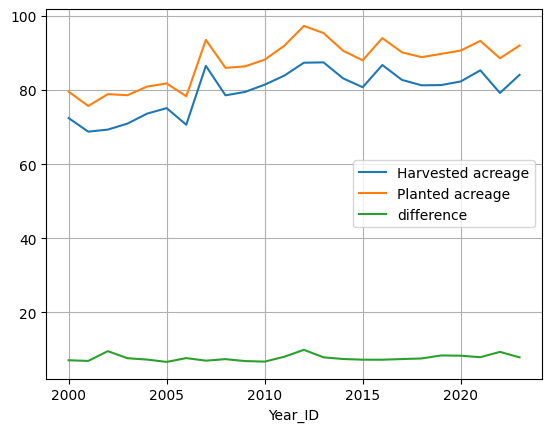

In [ ]:
# recreating graph in 12.1.1 Forecasting Harvested Acres
(
df_supply
    .assign(difference = lambda df: df['Planted acreage'] - df['Harvested acreage'])
    .query('Year_ID > 1999')
).plot(x='Year_ID', y=['Harvested acreage', 'Planted acreage', 'difference'], grid=True);

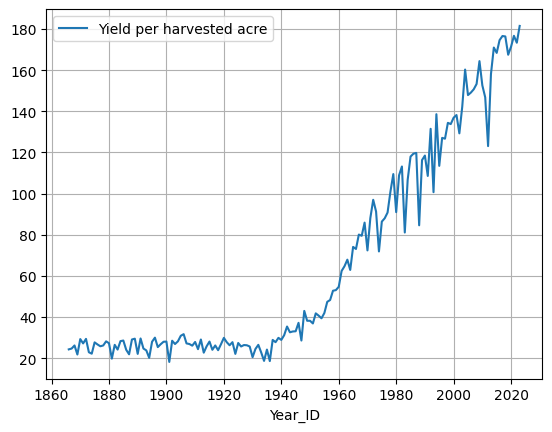

In [ ]:
# recreating graph in 12.2 Forecasting Yield
df_supply.plot(x='Year_ID', y=['Yield per harvested acre'], grid=True);

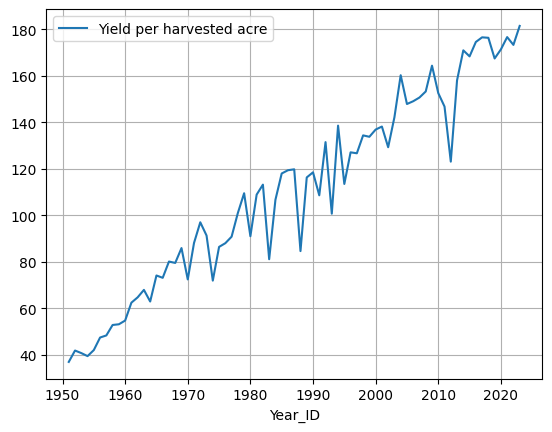

In [ ]:
# recreating graph in 12.2 Forecasting Yield
df_supply.query('Year_ID > 1950').plot(x='Year_ID', y=['Yield per harvested acre'], grid=True);

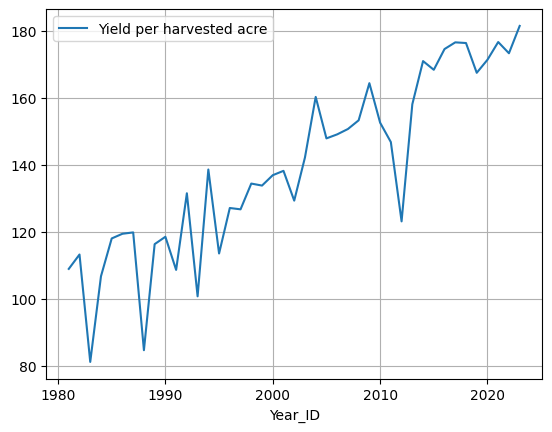

In [ ]:
# recreating graph in 12.2 Forecasting Yield
df_supply.query('Year_ID > 1980').plot(x='Year_ID', y=['Yield per harvested acre'], grid=True);

## Consumption

Let's now switch our attention to the demand side.  We begin by grabbing all the demand related attributes.

In [ ]:
attributes = ['Food, alcohol, and industrial use', 'Feed and residual use', 'Seed use', 'Exports, market year']

df_demand_tidy = \
    (
    df_feed_grains
        .query('SC_Commodity_Desc == "Corn"')
        .query('SC_GeographyIndented_Desc == "United States"')
        .query('SC_Attribute_Desc == @attributes')
        .query('Timeperiod_Desc.str.contains("MY")')
        [['SC_Commodity_Desc', 'SC_GeographyIndented_Desc', 'SC_Attribute_Desc', 'Timeperiod_Desc','Year_ID', 'Amount', 'SC_Unit_Desc']]
    )
df_demand_tidy

,SC_Commodity_Desc,SC_GeographyIndented_Desc,SC_Attribute_Desc,Timeperiod_Desc,Year_ID,Amount,SC_Unit_Desc
16525,Corn,United States,"Exports, market year",MY Sep-Aug,1975,1664.494,Million bushels
16530,Corn,United States,"Exports, market year",MY Sep-Aug,1976,1645.119,Million bushels
16535,Corn,United States,"Exports, market year",MY Sep-Aug,1977,1896.396,Million bushels
16540,Corn,United States,"Exports, market year",MY Sep-Aug,1978,2113.117,Million bushels
16633,Corn,United States,"Exports, market year",MY Sep-Aug,1979,2401.517,Million bushels
...,...,...,...,...,...,...,...
18601,Corn,United States,"Food, alcohol, and industrial use",MY Sep-Aug,2019,6256.213,Million bushels
18606,Corn,United States,"Food, alcohol, and industrial use",MY Sep-Aug,2020,6435.942,Million bushels
18611,Corn,United States,"Food, alcohol, and industrial use",MY Sep-Aug,2021,6734.439,Million bushels
18614,Corn,United States,"Food, alcohol, and industrial use",MY Sep-Aug,2022,6649.000,Million bushels


Now let's pivot our tidy data to make it a bit more usable.

In [ ]:
df_demand = \
    (
    df_demand_tidy
        .pivot(index='Year_ID', columns='SC_Attribute_Desc', values='Amount')
        .reset_index()
        [['Year_ID', 'Food, alcohol, and industrial use', 'Feed and residual use', 'Seed use', 'Exports, market year']]
        .assign(total_demand = lambda df: df['Food, alcohol, and industrial use'] + df['Feed and residual use'] + 
                df['Seed use'] + df['Exports, market year'])
    )
df_demand.head()

SC_Attribute_Desc,Year_ID,"Food, alcohol, and industrial use",Feed and residual use,Seed use,"Exports, market year",total_demand
0,1975,500.7,3581.760,20.1,1664.494,5767.054
1,1976,522.1,3601.881,20.1,1645.119,5789.200
2,1977,561.5,3729.743,19.5,1896.396,6207.139
3,1978,588.5,4274.362,19.5,2113.117,6995.479
4,1979,619.5,4563.043,20.0,2401.517,7604.060


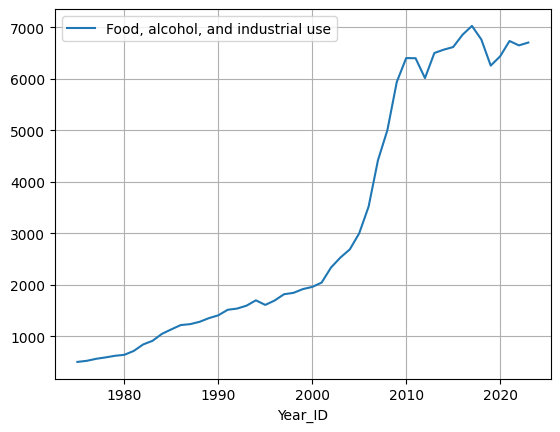

In [ ]:
# 13.1 Food, alcohol, and industrial use
df_demand.plot(x='Year_ID', y='Food, alcohol, and industrial use', grid=True);

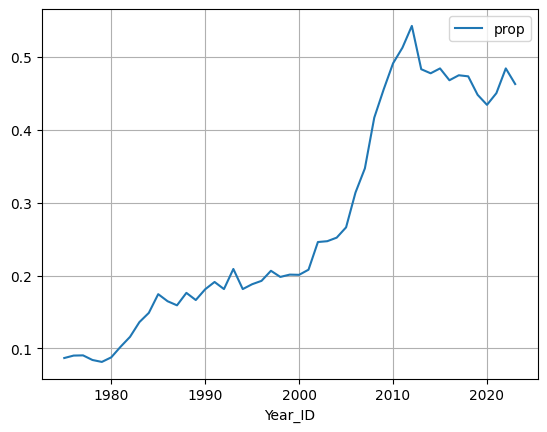

In [ ]:
# 13.1 Food, alcohol, and industrial use as proportion of total demand
(
df_demand.
    assign(prop = lambda df: df['Food, alcohol, and industrial use'] / df['total_demand'])
).plot(x='Year_ID', y='prop', grid=True);

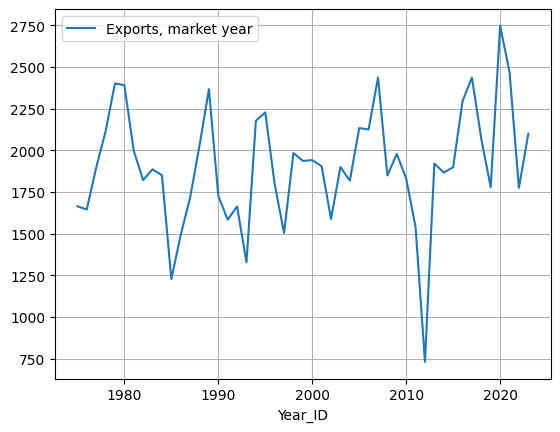

In [ ]:
# 13.2 Exports
df_demand.plot(x='Year_ID', y='Exports, market year', grid=True);

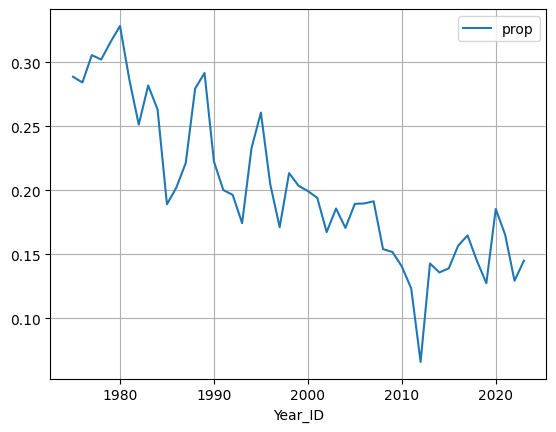

In [ ]:
# 13.2 Exports as a proportion of total demand
(
df_demand.
    assign(prop = lambda df: df['Exports, market year'] / df['total_demand'])
).plot(x='Year_ID', y='prop', grid=True);

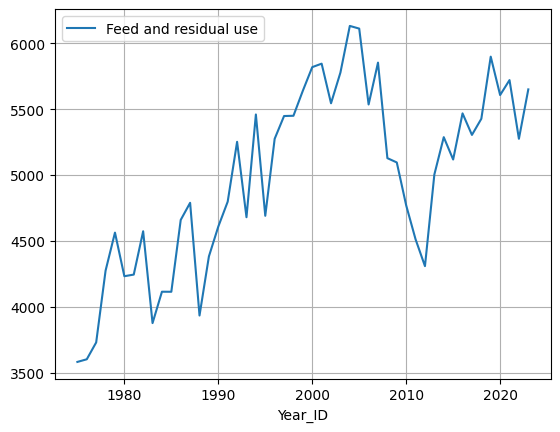

In [ ]:
# 13.3 Feed and residuals
df_demand.plot(x='Year_ID', y='Feed and residual use', grid=True);

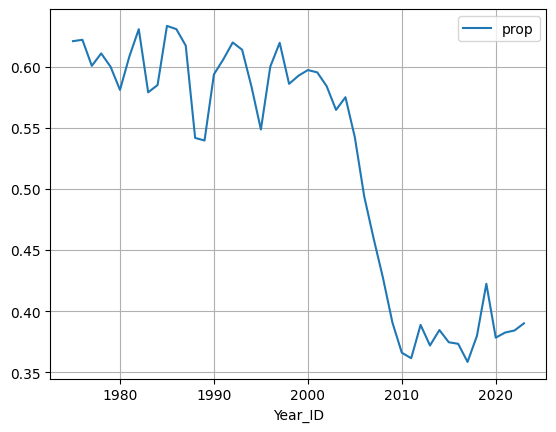

In [ ]:
# 13.3 Feed and residuals as a proportion of total demand
(
df_demand.
    assign(prop = lambda df: df['Feed and residual use'] / df['total_demand'])
).plot(x='Year_ID', y='prop', grid=True);

## Ending Stocks and Price

Let's now analyze the relationship between price and ending stocks.  This is done in Chapter 15 (Ending Stocks and Price).

We begin by examining a scatter plot of stocks-to-use vs prices received by farmers.  I would guess there would be a negative relationship here and that is the case.

In [ ]:
# corn stocks-to-use and prices received by farmers
df_surplus = \
    (
    df_supply[['Year_ID', 'total_supply', 'Prices received by farmers']]
        .merge(df_demand[['Year_ID', 'total_demand']], how='inner')
        .assign(stocks_ratio = lambda df: (df['total_supply'] - df['total_demand']) / df['total_demand'])
df_surplus.plot(x='stocks_ratio', y='Prices received by farmers', kind='scatter', grid=True);

SyntaxError: '(' was never closed (2394339635.py, line 3)

Let's run a regression on this data set.

In [ ]:
from sklearn.linear_model import LinearRegression
df_X = df_surplus.dropna()[['stocks_ratio']]
df_y = df_surplus.dropna()[['Prices received by farmers']]
model = LinearRegression()
model.fit(df_X, df_y)

As we see we get an $R^2$ of 0.22 which isn't bad in the world of finance.

In [ ]:
model.score(df_X, df_y)

For every percent increase in stocks-to-use ratio there is about a $0.05 reduction in the price received by farmers.

In [ ]:
model.coef_ / 100

### Analyzing Pre-2006

Mallory suggests breaking down the analysis into pre-2006 and post-2006 because that's when the ethanol mandates came into play.

We begin with pre-2006.

In [ ]:
df_surplus_pre_2006 = df_surplus.query('Year_ID < 2006')
df_surplus_pre_2006.plot(x='stocks_ratio', y='Prices received by farmers', kind='scatter', grid=True);

Let's fit a regression to the pre-2006 data.

In [ ]:
from sklearn.linear_model import LinearRegression
df_X = df_surplus_pre_2006.dropna()[['stocks_ratio']]
df_y = df_surplus_pre_2006.dropna()[['Prices received by farmers']]
model = LinearRegression()
model.fit(df_X, df_y)

It doesn't seem to help our $R^2$, but it does significantly change our coefficient, which is good to know.

In [ ]:
model.score(df_X, df_y)

In [ ]:
model.coef_ / 100

### Analyzing post-2006

Now let's do the post-2006 analysis.

In [ ]:
df_surplus_post_2006 = df_surplus.query('Year_ID >= 2006')
df_surplus_post_2006.plot(x='stocks_ratio', y='Prices received by farmers', kind='scatter', grid=True);

Let's now fit a regression to the post-2006 data.

In [ ]:
from sklearn.linear_model import LinearRegression
df_X = df_surplus_post_2006.dropna()[['stocks_ratio']]
df_y = df_surplus_post_2006.dropna()[['Prices received by farmers']]
model = LinearRegression()
model.fit(df_X, df_y)

Our $R^2$ improves and the negative relationship is much more pronounced.

In [ ]:
model.score(df_X, df_y)

In [ ]:
model.coef_ / 100